In [1]:
import pandas as pd
import numpy as np
from statistics import mean, stdev
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, \
KFold, StratifiedKFold,\
cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [96]:
def holdout_estimation(model,X,y,test_size=0.3,seed=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return (accuracy_score(y_test,y_pred))

In [3]:
def plot_decisionBound(model,X,y):
    disp = DecisionBoundaryDisplay.from_estimator(
        model, X, response_method="predict",
        alpha=0.5)
    disp.ax_.scatter(X['X1'], X['X2'], c=y, edgecolor="k") 
    plt.show()

In [4]:
def cv_estimation_seed(model,X,y,k=10,seed=0):
    cv = KFold(n_splits=k,random_state=seed,shuffle=True)
    val_scores = []
    for train, test in cv.split(X, y):
        model.fit(X.loc[train,:], y[train])
        y_pred = model.predict(X.loc[test,:])
        val_scores += [accuracy_score(y[test],y_pred)]
    return val_scores

In [5]:
def cv_estimation(model,X,y,k=10):
    val_scores = cross_val_score(model, X, y, cv=k)
    return val_scores

In [6]:
df1 = pd.read_csv("ds1.csv")
df2 = pd.read_csv("ds2.csv")
df3 = pd.read_csv("ds3.csv")

#2. Defining features and Target
X1 = df1.drop(['Class'], axis=1)
y1 = df1.Class

X2 = df2.drop(['Class'], axis=1)
y2 = df2.Class

X3 = df3.drop(['Class'], axis=1)
y3 = df3.Class

In [7]:
linear_svc = SVC(kernel="linear")
poly_svc = SVC(kernel="poly")
rbf_svc = SVC(kernel="rbf")

In [8]:
holdout_estimation(linear_svc,X1,y1)

1.0

In [9]:
linear_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [10]:
linear_svc.support_vectors_

array([[-2.41743685,  7.02671721],
       [-1.68665271,  7.79344248],
       [ 5.15492652,  5.82590117],
       [ 1.3986115 ,  0.94878204],
       [-6.56871963, -5.40475338],
       [-5.42848358, -5.92083877]])

In [11]:
holdout_estimation(poly_svc,X1,y1)

1.0

In [12]:
poly_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [13]:
poly_svc.support_vectors_

array([[-2.26723535,  7.10100588],
       [-2.16557933,  7.25124597],
       [-2.30033403,  7.054616  ],
       [-2.41743685,  7.02671721],
       [ 2.61473625,  2.159624  ],
       [ 3.26220947,  1.03534464],
       [ 5.15492652,  5.82590117],
       [ 3.40292813,  0.65271307],
       [ 1.3986115 ,  0.94878204],
       [-6.56871963, -5.40475338],
       [-5.42848358, -5.92083877],
       [-5.72151632, -6.0884469 ]])

In [14]:
holdout_estimation(rbf_svc,X1,y1)

1.0

In [15]:
rbf_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [16]:
rbf_svc.support_vectors_

array([[-2.26723535,  7.10100588],
       [-0.62301172,  9.18886394],
       [-5.12894273,  9.83618863],
       [-2.30033403,  7.054616  ],
       [-2.44896741, 11.47752824],
       [-2.41743685,  7.02671721],
       [ 2.61473625,  2.159624  ],
       [ 5.15492652,  5.82590117],
       [ 6.9545374 ,  0.10590449],
       [ 1.3986115 ,  0.94878204],
       [-4.68982426, -7.68840788],
       [-5.42848358, -5.92083877],
       [-8.1998604 , -5.04865083],
       [-9.00352292, -7.40586461]])

In [17]:
holdout_estimation(poly_svc,X3,y3)

0.3333333333333333

In [18]:
poly_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [19]:
poly_svc.support_vectors_

array([[-3.54508708e-01, -1.04761123e-01],
       [-2.03932866e-01, -1.82175412e-01],
       [ 7.59652532e-01, -4.23006228e-01],
       [ 4.40266392e-01,  6.88971856e-01],
       [-5.48242449e-01, -1.44619508e-01],
       [-2.53489021e-02, -2.87552449e-01],
       [-3.34077366e-01,  2.11836468e-03],
       [ 2.09394788e-01, -5.92886004e-01],
       [-4.90483591e-01, -3.74436600e-01],
       [-5.05396895e-02, -3.64009956e-01],
       [-3.60156571e-01, -4.58240389e-01],
       [ 1.93421376e-01,  5.53438911e-01],
       [ 6.79123574e-02, -3.69828149e-02],
       [ 3.07968855e-01, -2.08498763e-01],
       [ 1.81672745e-01,  2.74492571e-01],
       [ 3.99325437e-01,  6.68488169e-01],
       [ 7.55413982e-01,  2.15268581e-01],
       [ 4.70716353e-02,  3.94844209e-01],
       [ 6.31979446e-01,  3.95126867e-02],
       [ 7.61995878e-02, -5.66445930e-01],
       [ 7.13840771e-01,  1.33370962e-01],
       [ 3.54020332e-01, -3.55130253e-02],
       [ 2.35045859e-02,  5.53776978e-01],
       [ 5.

Dataset 1 - Accuracy by Holdout
linear svm: 1.0


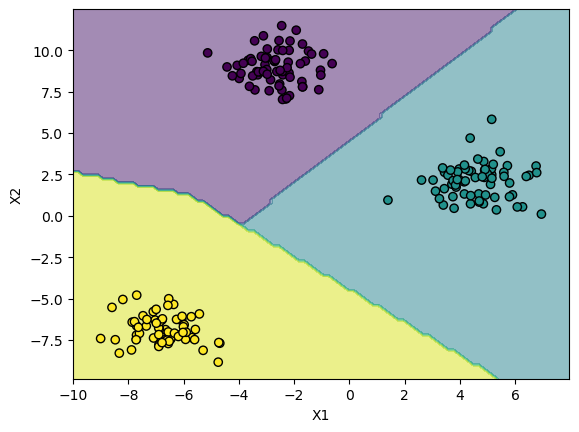

polynomial svm: 1.0


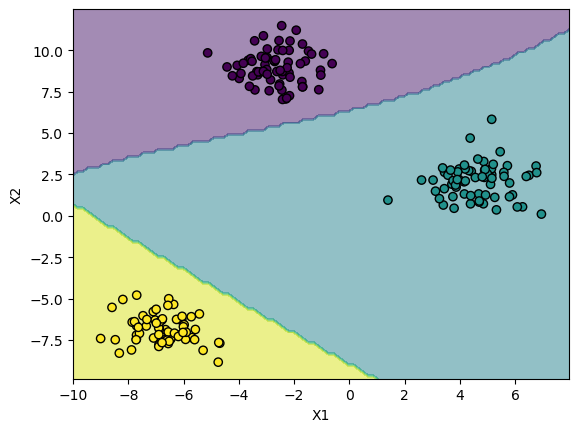

rbf svm: 1.0


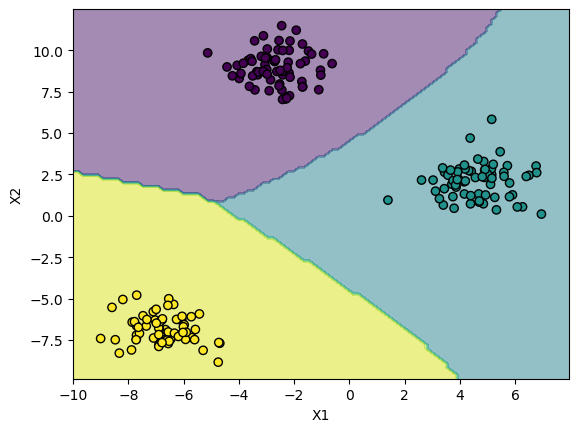

In [20]:
print("Dataset 1 - Accuracy by Holdout")
print(f'linear svm: {holdout_estimation(linear_svc,X1,y1)}')
plot_decisionBound(linear_svc,X1,y1)
print(f'polynomial svm: {holdout_estimation(poly_svc,X1,y1)}')
plot_decisionBound(poly_svc,X1,y1)
print(f'rbf svm: {holdout_estimation(rbf_svc,X1,y1)}')
plot_decisionBound(rbf_svc,X1,y1)


Dataset 2 - Accuracy by Holdout
linear svm: 0.8833333333333333


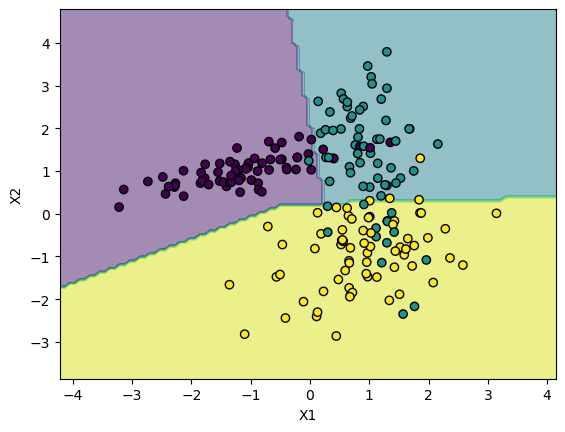

polynomial svm: 0.7833333333333333


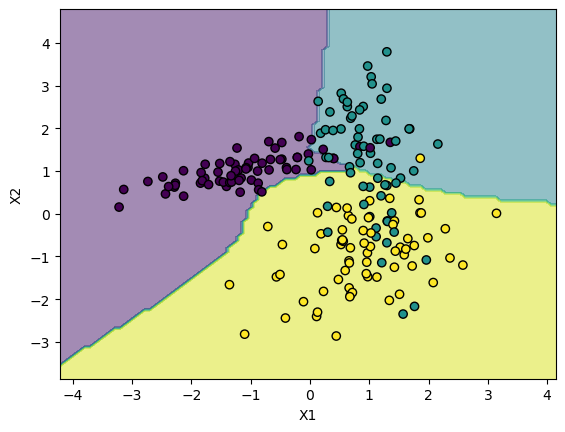

rbf svm: 0.8666666666666667


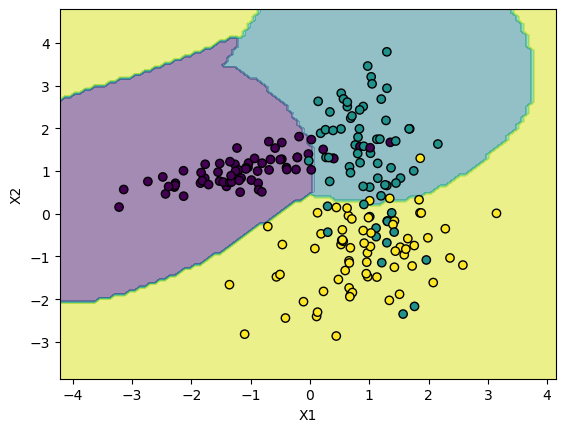

In [21]:
print("\nDataset 2 - Accuracy by Holdout")
print(f'linear svm: {holdout_estimation(linear_svc,X2,y2)}')
plot_decisionBound(linear_svc,X2,y2)
print(f'polynomial svm: {holdout_estimation(poly_svc,X2,y2)}')
plot_decisionBound(poly_svc,X2,y2)
print(f'rbf svm: {holdout_estimation(rbf_svc,X2,y2)}')
plot_decisionBound(rbf_svc,X2,y2)


Dataset 3 - Accuracy by Holdout
linear svm: 0.35


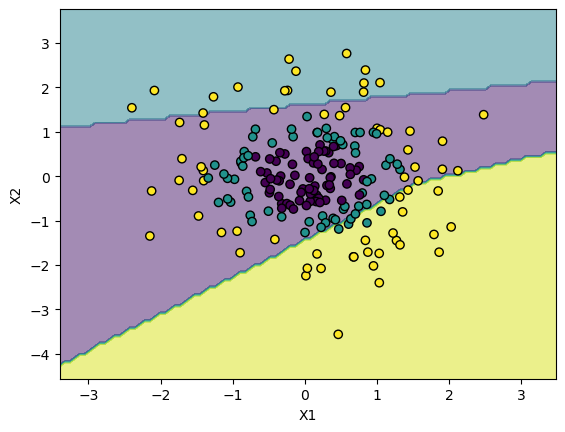

polynomial svm: 0.3333333333333333


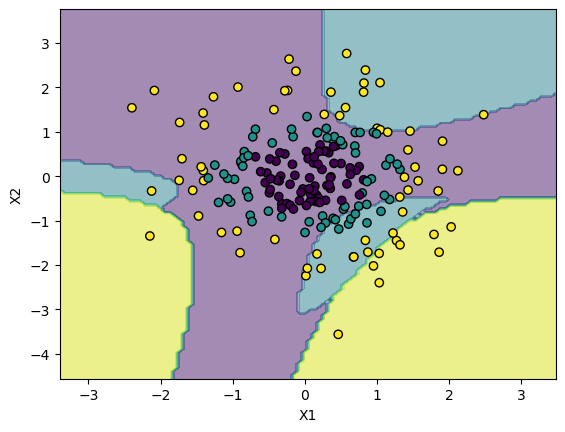

rbf svm: 0.8833333333333333


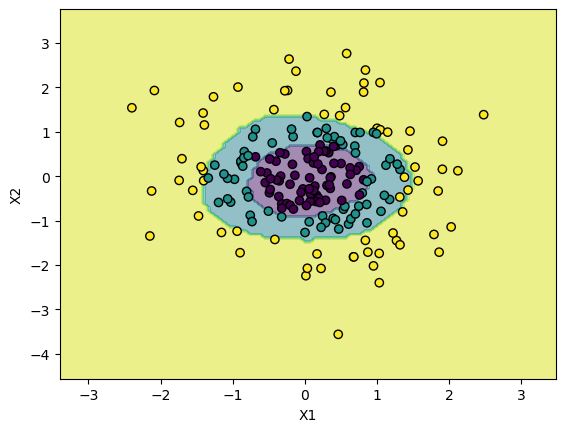

In [22]:
print("\nDataset 3 - Accuracy by Holdout")
print(f'linear svm: {holdout_estimation(linear_svc,X3,y3)}')
plot_decisionBound(linear_svc,X3,y3)
print(f'polynomial svm: {holdout_estimation(poly_svc,X3,y3)}')
plot_decisionBound(poly_svc,X3,y3)
print(f'rbf svm: {holdout_estimation(rbf_svc,X3,y3)}')
plot_decisionBound(rbf_svc,X3,y3)

In [23]:
print("Dataset 1 - Accuracy by CV")
accuracy_cv = cv_estimation(linear_svc,X1,y1)
print(f'linear svm:{mean(accuracy_cv)} +/- {stdev(accuracy_cv)}')
accuracy_cv = cv_estimation(poly_svc,X1,y1)
print(f'polynomial svm:{mean(accuracy_cv)} +/- {stdev(accuracy_cv)}')
accuracy_cv = cv_estimation(rbf_svc,X1,y1)
print(f'rbf svm:{mean(accuracy_cv)} +/- {stdev(accuracy_cv)}')

Dataset 1 - Accuracy by CV
linear svm:1.0 +/- 0.0
polynomial svm:1.0 +/- 0.0
rbf svm:1.0 +/- 0.0


In [24]:
print("\nDataset 2 - Accuracy by CV")
accuracy_cv = cv_estimation(linear_svc,X2,y2)
print(f'svm:{mean(accuracy_cv)} +/- {stdev(accuracy_cv)}')
accuracy_cv = cv_estimation(poly_svc,X2,y2)
print(f'polynomial svm:{mean(accuracy_cv)} +/- {stdev(accuracy_cv)}')
accuracy_cv = cv_estimation(rbf_svc,X2,y2)
print(f'rbf svm:{mean(accuracy_cv)} +/- {stdev(accuracy_cv)}')


Dataset 2 - Accuracy by CV
svm:0.87 +/- 0.05374838498865698
polynomial svm:0.845 +/- 0.07619419633774974
rbf svm:0.865 +/- 0.06258327785172861


In [25]:
print("\nDataset 3 - Accuracy by CV")
accuracy_cv = cv_estimation(linear_svc,X3,y3)
print(f'svm:{mean(accuracy_cv)} +/- {stdev(accuracy_cv)}')
accuracy_cv = cv_estimation(poly_svc,X3,y3)
print(f'polynomial svm:{mean(accuracy_cv)} +/- {stdev(accuracy_cv)}')
accuracy_cv = cv_estimation(rbf_svc,X3,y3)
print(f'rbf svm:{mean(accuracy_cv)} +/- {stdev(accuracy_cv)}')


Dataset 3 - Accuracy by CV
svm:0.32 +/- 0.08232726023485647
polynomial svm:0.44 +/- 0.0737864787372622
rbf svm:0.915 +/- 0.0747217059048663


In [26]:
svc = SVC()
svc_params = {'kernel':('linear', 'poly', 'rbf'), 'gamma':('scale','auto')}

In [100]:
grid_search = GridSearchCV(svc,svc_params)
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=0)
grid_search.fit(X3,y3)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
                          'degree': [2, 3, 4], 'kernel': ['poly']},
                         {'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
                          'gamma': ['auto', 'scale'], 'kernel': ['rbf']}])

In [101]:
grid_search.best_params_

{'C': 1000, 'degree': 4, 'kernel': 'poly'}

In [102]:
grid_search.best_estimator_

SVC(C=1000, degree=4, kernel='poly')

In [103]:
rand_search = RandomizedSearchCV(svc,svc_params,random_state=0)
rand_search.fit(X3,y3)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions=[{'C': [0.0001, 0.001, 0.1, 1, 10, 100,
                                               1000],
                                         'kernel': ['linear']},
                                        {'C': [0.0001, 0.001, 0.1, 1, 10, 100,
                                               1000],
                                         'degree': [2, 3, 4],
                                         'kernel': ['poly']},
                                        {'C': [0.0001, 0.001, 0.1, 1, 10, 100,
                                               1000],
                                         'gamma': ['auto', 'scale'],
                                         'kernel': ['rbf']}],
                   random_state=0)

In [104]:
rand_search.best_params_

{'kernel': 'poly', 'degree': 4, 'C': 1000}

In [105]:
svc_params = [
    {'kernel':['linear'],
    'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
    {'kernel':['poly'],
    'degree': [2, 3, 4],
    'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
    {'kernel':['rbf'],
    'gamma': ['auto', 'scale'],
    'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
]
#C - constante de regularização, ie os pontos que estamos a deixar dentro da margem
grid_search = GridSearchCV(SVC(),svc_params)

In [106]:
grid_search.fit(X3,y3)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
                          'degree': [2, 3, 4], 'kernel': ['poly']},
                         {'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
                          'gamma': ['auto', 'scale'], 'kernel': ['rbf']}])

In [107]:
grid_search.best_params_

{'C': 1000, 'degree': 4, 'kernel': 'poly'}

In [108]:
rand_search = RandomizedSearchCV(SVC(),svc_params)
rand_search.fit(X3,y3)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions=[{'C': [0.0001, 0.001, 0.1, 1, 10, 100,
                                               1000],
                                         'kernel': ['linear']},
                                        {'C': [0.0001, 0.001, 0.1, 1, 10, 100,
                                               1000],
                                         'degree': [2, 3, 4],
                                         'kernel': ['poly']},
                                        {'C': [0.0001, 0.001, 0.1, 1, 10, 100,
                                               1000],
                                         'gamma': ['auto', 'scale'],
                                         'kernel': ['rbf']}])

In [109]:
rand_search.best_params_

{'kernel': 'poly', 'degree': 2, 'C': 1000}

In [110]:
print("\nDataset 3 - Accuracy by CV")
accuracy_cv = cv_estimation(grid_search.best_estimator_,X3,y3)
print(f'grid-search svm:{mean(accuracy_cv)} +/- {stdev(accuracy_cv)}')


Dataset 3 - Accuracy by CV
grid-search svm:0.985 +/- 0.024152294576982418


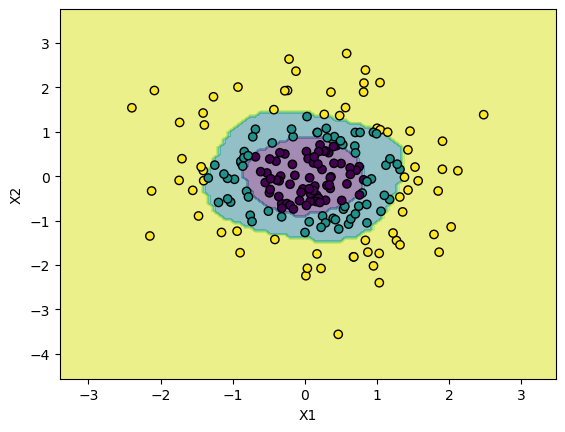

In [112]:
plot_decisionBound(grid_search.best_estimator_,X3,y3)

In [115]:
rand_search.fit(X3,y3)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions=[{'C': [0.0001, 0.001, 0.1, 1, 10, 100,
                                               1000],
                                         'kernel': ['linear']},
                                        {'C': [0.0001, 0.001, 0.1, 1, 10, 100,
                                               1000],
                                         'degree': [2, 3, 4],
                                         'kernel': ['poly']},
                                        {'C': [0.0001, 0.001, 0.1, 1, 10, 100,
                                               1000],
                                         'gamma': ['auto', 'scale'],
                                         'kernel': ['rbf']}])

In [119]:
rand_search.best_params_

{'kernel': 'poly', 'degree': 2, 'C': 1000}

In [120]:
print("\nDataset 3 - Accuracy by CV")
accuracy_cv = cv_estimation(rand_search.best_estimator_,X3,y3)
print(f'random-search svm:{mean(accuracy_cv)} +/- {stdev(accuracy_cv)}')


Dataset 3 - Accuracy by CV
random-search svm:0.98 +/- 0.03496029493900506


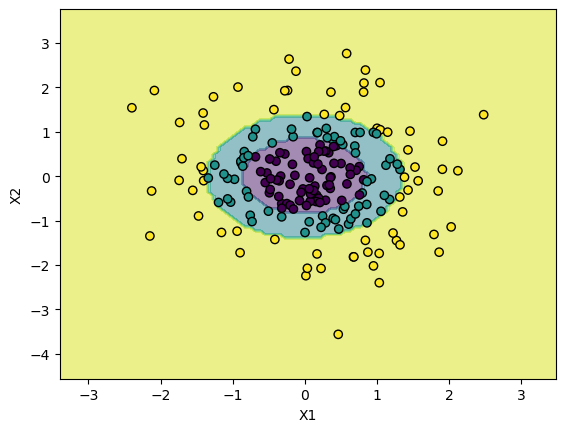

In [121]:
plot_decisionBound(rand_search.best_estimator_,X3,y3)

In [122]:
linear_svc = make_pipeline(StandardScaler(), SVC(kernel="linear"))
poly_svc = make_pipeline(StandardScaler(), SVC(kernel="poly"))
rbf_svc = make_pipeline(StandardScaler(), SVC(kernel="rbf"))

In [123]:
mlp = MLPClassifier()

In [124]:
print("Dataset 1 - Accuracy by Holdout")
print(f'mlp: {holdout_estimation(mlp,X1,y1)}')
print("\nDataset 2 - Accuracy by Holdout")
print(f'mlp: {holdout_estimation(mlp,X2,y2)}')
print("\nDataset 3 - Accuracy by Holdout")
print(f'mlp: {holdout_estimation(mlp,X3,y3)}')

Dataset 1 - Accuracy by Holdout
mlp: 1.0

Dataset 2 - Accuracy by Holdout
mlp: 0.8666666666666667

Dataset 3 - Accuracy by Holdout
mlp: 0.8833333333333333


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [125]:
print("Dataset 1 - Accuracy by CV")
accuracy_cv = cv_estimation(mlp,X1,y1)
print(f'mlp:{mean(accuracy_cv)} +/- {stdev(accuracy_cv)}')

print("\nDataset 2 - Accuracy by CV")
accuracy_cv = cv_estimation(mlp,X2,y2)
print(f'mlp:{mean(accuracy_cv)} +/- {stdev(accuracy_cv)}')

print("\nDataset 3 - Accuracy by CV")
accuracy_cv = cv_estimation(mlp,X3,y3)
print(f'mlp:{mean(accuracy_cv)} +/- {stdev(accuracy_cv)}')

Dataset 1 - Accuracy by CV
mlp:1.0 +/- 0.0

Dataset 2 - Accuracy by CV


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the 

mlp:0.865 +/- 0.05296749527356899

Dataset 3 - Accuracy by CV


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the 

mlp:0.865 +/- 0.08181958472422385


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
